<a href="https://colab.research.google.com/github/WeiShaoD/Scripts/blob/main/fMRI_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
import pandas as pd
import numpy as np
import os
import nibabel
import matplotlib.pyplot as plt

# Enable plots inside the Jupyter Notebook
%matplotlib inline

In [ ]:
# Define the URL of the data and download it using the Requests libary
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.zip'
data = requests.get(url)

# Check if the targed folder for storing the data already exists. If not create it and save the zip file.
if os.path.exists('./fMRI_data') == False:
    os.mkdir('fMRI_data')
    
open('./fMRI_data/data.zip', 'wb').write(data.content)

# Un-zip the file
zip_ref = zipfile.ZipFile('./fMRI_data/data.zip', 'r')
zip_ref.extractall('./fMRI_data/')
zip_ref.close()

In [ ]:
# Find all files in the structural data folder
data_path = './fMRI_data/sM00223/'
files = os.listdir(data_path)

# Read in the data
data_all = []
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_fdata()

In [ ]:
data = np.rot90(data.squeeze(), 1)

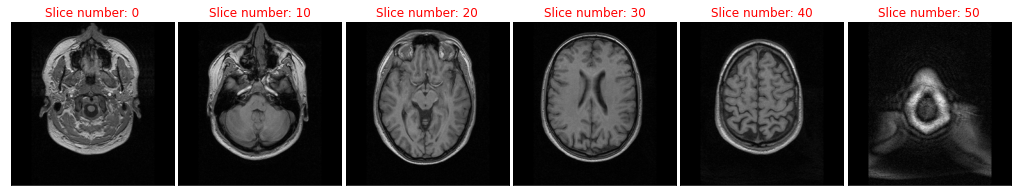

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=[18, 3])

n = 0
slice = 0
for _ in range(6):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice += 10
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
# Basic information about the data acquisition
x_size = 64
y_size = 64
n_slice = 64
n_volumes = 96

# Find all files in the data folder
data_path = './fMRI_data/fM00223/'
files = os.listdir(data_path)

# Read in the data and organize it with respect to the acquisition parameters
data_all = []
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_data()        
        data_all.append(data.reshape(x_size, y_size, n_slice))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return

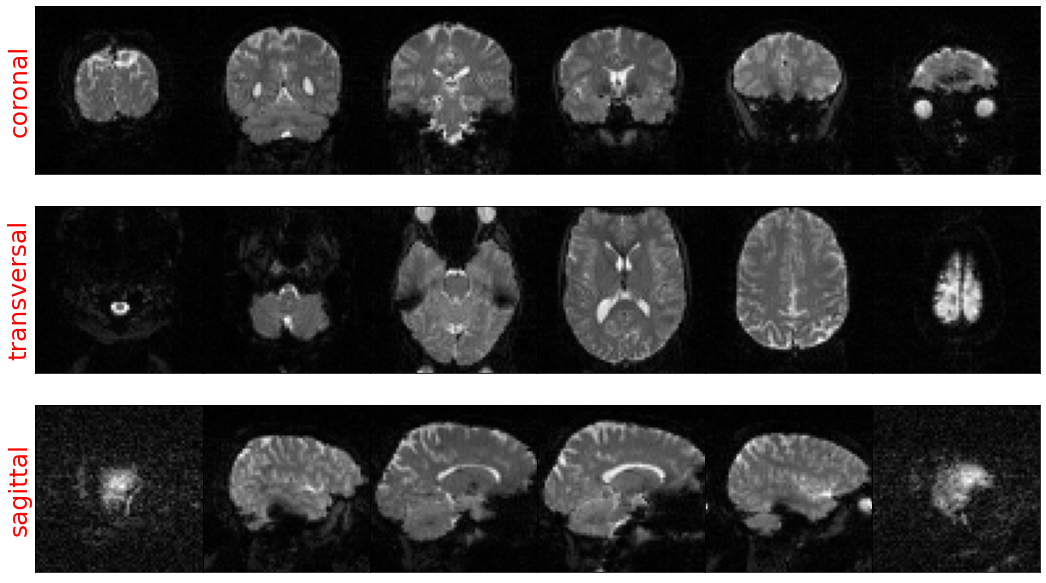

In [ ]:
# Create a 3x6 subplot 
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

# Orgaize the data for visualisation in the coronal plane
coronal = np.transpose(data_all, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane
transversal = np.transpose(data_all, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane
sagittal = np.transpose(data_all, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)

# Plot some of the images in different planes
n = 10
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n, 0], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 10
    
n = 5
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n, 0], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 10
    
n = 5
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n, 0], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n += 10

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

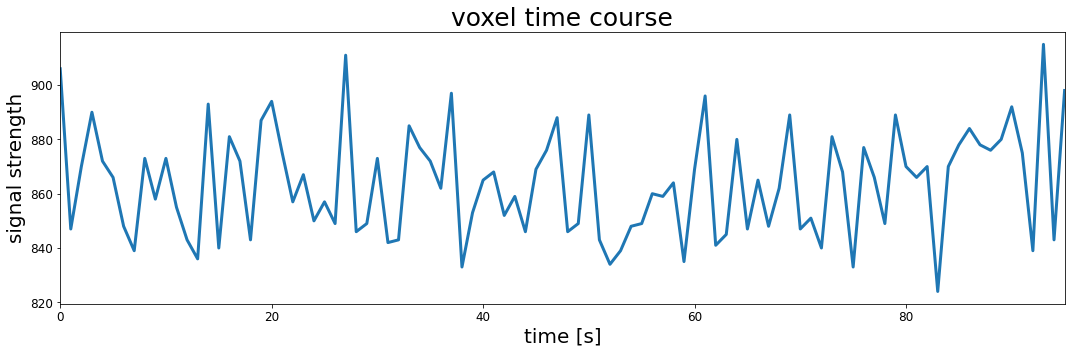

In [ ]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# Plot the timecourse of a random voxel
ax.plot(transversal[30, 30, 35, :], lw=3)
ax.set_xlim([0, transversal.shape[3]-1])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

In [ ]:
# Rearrange and reshape data for export
data_all = np.transpose(data_all, [3, 2, 1, 0])

#print(data_all.shape)

data_all = np.reshape(data_all, [n_slice, y_size*x_size, n_volumes])

#print(data_all.shape)

# Check if output path exists, if not create it.
if os.path.exists('./fMRI_data/csv_data') == False:
    os.mkdir('./fMRI_data/csv_data')

# Export each slice as a .csv file 
n = 0
for export in data_all:

    save_file = 'slice_{}.csv'.format(n)
    save_path = './fMRI_data/csv_data/{}'.format(save_file)
    pd.DataFrame(export).to_csv(save_path, header=False, index=False)
    n += 1

ValueError: ignored

In [ ]:
# Import the data for slice 36
data = np.genfromtxt('./fMRI_data/csv_data/slice_36.csv', delimiter=',')

In [ ]:
# These are the main parameters of the fMRI scan and experimental desgin
block_design    = ['rest', 'stim']
block_size      = 6
block_RT        = 7
block_total     = 16
block_length    = block_size*block_RT

acq_num         = block_size*block_total
data_time       = block_length*block_total
data_time_vol   = np.arange(acq_num)*block_RT

x_size = 64
y_size = 64


In [ ]:
data_ordered = data.reshape(x_size,y_size,acq_num)
print(data_ordered.shape)

(64, 64, 96)


AttributeError: ignored

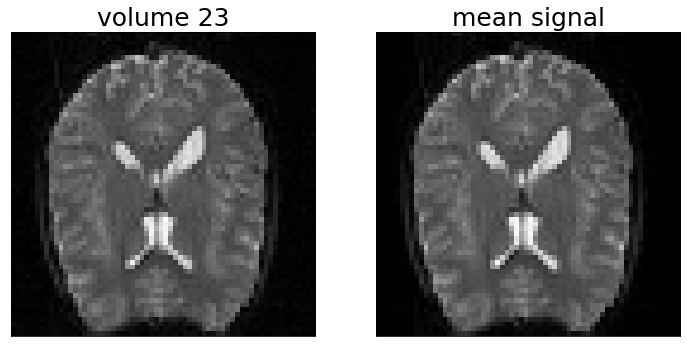

In [ ]:
# Average all volumes
mean_data = data_ordered.mean(axis=2)

# Create plots
fig, ax = plt.subplots(1, 2,figsize=(12, 6))

# Plot volume number 23
ax[0].imshow(data_ordered[:, :, 23], cmap='gray')
ax[0].set_title('volume 23', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

# PLot mean signal intensities
ax[1].imshow(mean_data, cmap='gray')
ax[1].set_title('mean signal', fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

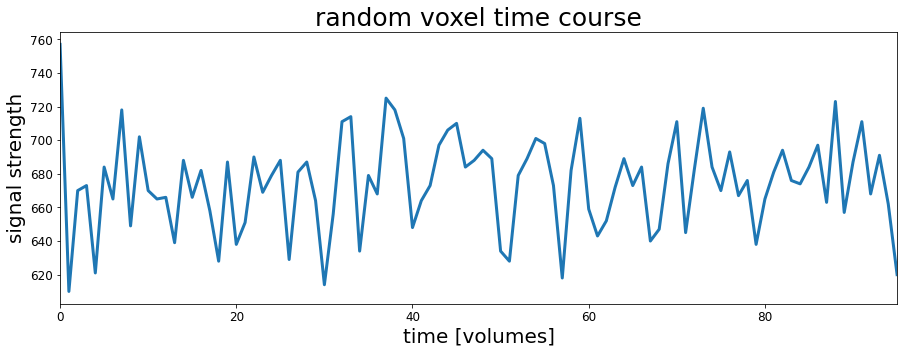

In [ ]:
# Select a random voxel by getting one random x- and y-coorinate
x_voxel = np.random.randint(64)
y_voxel = np.random.randint(64)

# Create the plot
fig, ax = plt.subplots(1,1,figsize=(15, 5))
ax.plot(data_ordered[x_voxel, y_voxel], lw=3)
ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('random voxel time course', fontsize=25)
ax.tick_params(labelsize=12)
plt.show()

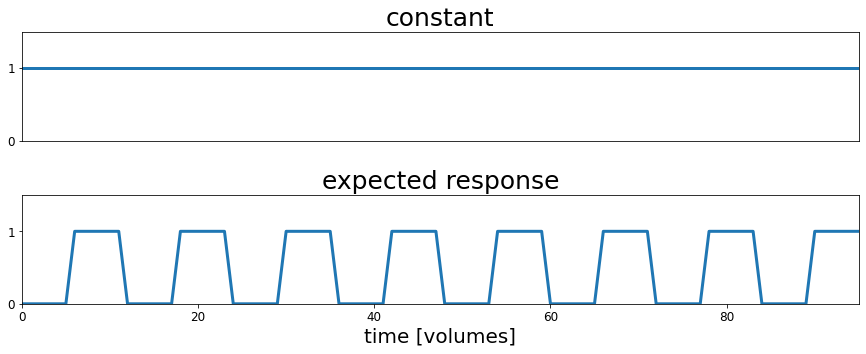

In [ ]:
# Create the design matrix
constant = np.ones(acq_num)
rest     = np.zeros(block_size)
stim     = np.ones(block_size)
block    = np.concatenate((rest, stim), axis=0)
predicted_response = np.tile(block, int(block_total/2))

design_matrix = np.array((constant, predicted_response))

# Create the plots
fig, ax = plt.subplots(2,1, figsize=(15, 5))
ax[0].plot(design_matrix[0], lw=3)
ax[0].set_xlim(0, acq_num-1)
ax[0].set_ylim(0, 1.5)
ax[0].set_title('constant', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([0,1])
ax[0].tick_params(labelsize=12)
ax[0].tick_params(labelsize=12)

ax[1].plot(design_matrix[1], lw=3)
ax[1].set_xlim(0, acq_num-1)
ax[1].set_ylim(0, 1.5)
ax[1].set_title('expected response', fontsize=25)
ax[1].set_yticks([0,1])
ax[1].set_xlabel('time [volumes]', fontsize=20)
ax[1].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)

fig.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

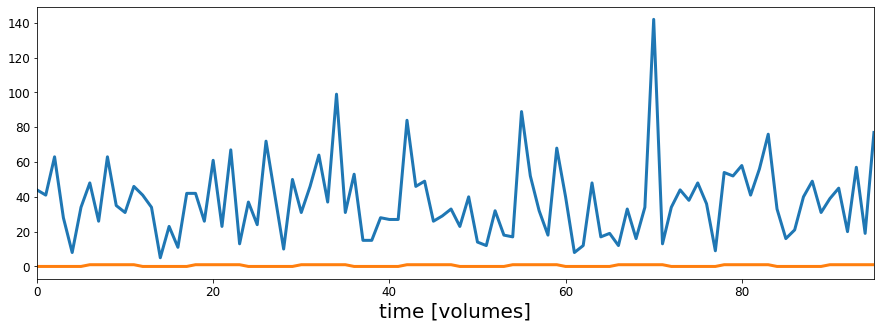

In [ ]:
# Calculate the correlation coefficients
c = np.corrcoef(design_matrix[1,:], data)[1:,0]

# Find the voxel with the highest correlation coefficient
strongest_correlated = data[c.argmax(),:]

# Create the plots
fig, ax = plt.subplots(1,1,figsize=(15, 5))
ax.plot(strongest_correlated, lw=3)
ax.plot(design_matrix[1,:], lw=3)
ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.tick_params(labelsize=12)
plt.show()

In [ ]:
# Define the min-max scaling function
def scale(data):
    return (data - data.min()) / (data.max() - data.min())

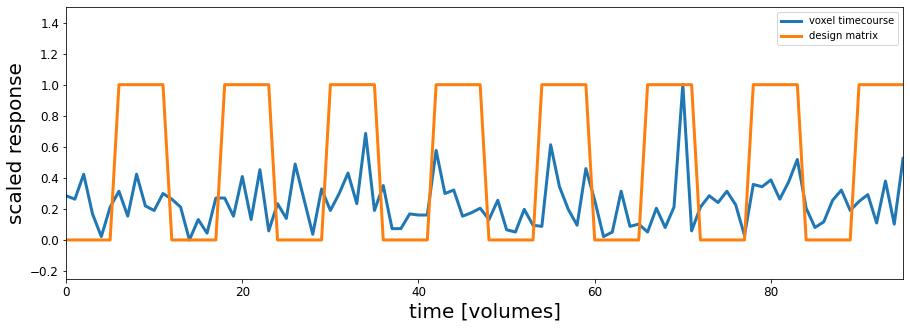

In [ ]:
# Scale the voxel with the highest correlation
strongest_correlated_scaled = scale(data[c.argmax(),:])

# Create the plots
fig, (ax) = plt.subplots(1,1,figsize=(15, 5))
ax.plot(strongest_correlated_scaled, label='voxel timecourse', lw=3)
ax.plot(design_matrix[1,:], label='design matrix', lw=3)
ax.set_xlim(0, acq_num-1)
ax.set_ylim(-0.25, 1.5)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.set_ylabel('scaled response', fontsize=20)
ax.tick_params(labelsize=12)
ax.legend()
plt.show()

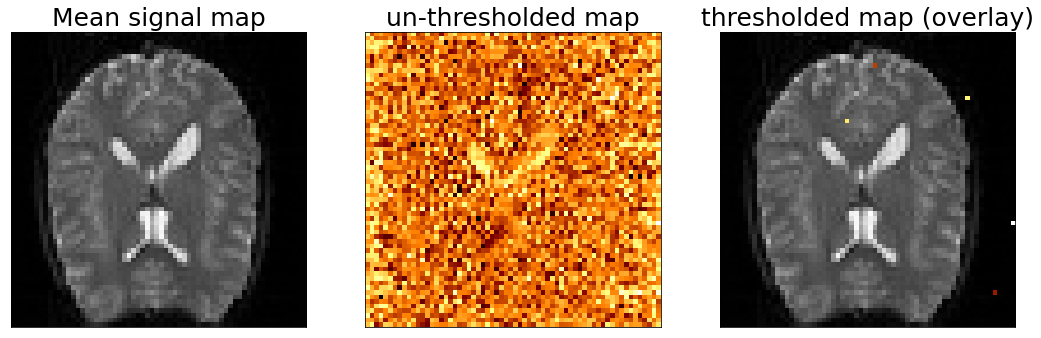

In [ ]:
corr = c.reshape(x_size, y_size)
map = corr.copy()
map[map < 0.3] = np.nan

# Ok now lets visualize all the maps
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Create the plots
ax[0].imshow(mean_data, cmap='gray')
ax[0].set_title('Mean signal map', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(corr,  cmap='afmhot')
ax[1].set_title('un-thresholded map', fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(mean_data, cmap='gray')
ax[2].imshow(map, cmap='afmhot')
ax[2].set_title('thresholded map (overlay)', fontsize=25)
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

In [ ]:
# Import the data for slice 36
data = np.genfromtxt('./fMRI_data/csv_data/slice_36.csv', delimiter=',')

# These are the main parameters of the fMRI scan and experimental desgin
block_design    = ['rest', 'stim']
block_size      = 6
block_RT        = 7
block_total     = 16
block_length    = block_size*block_RT

acq_num         = block_size*block_total
data_time       = block_length*block_total
data_time_vol   = np.arange(acq_num)*block_RT

x_size = 64
y_size = 64

# Reshape the data
data_ordered = data.reshape(x_size, y_size, acq_num)

# Calculate the mean signal for each voxel
mean_data = data_ordered.mean(axis=2)

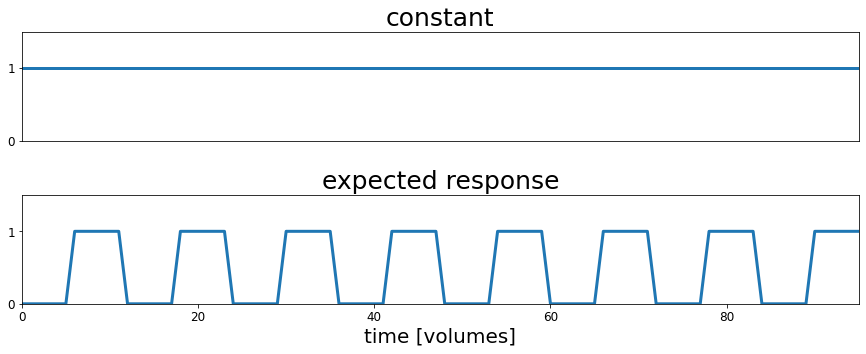

In [ ]:
# Create the design matrix
constant = np.ones(acq_num)
rest     = np.zeros(block_size)
stim     = np.ones(block_size)
block    = np.concatenate((rest, stim), axis=0)
predicted_response = np.tile(block, int(block_total/2))

design_matrix = np.array((constant, predicted_response))

# Create the plots
fig, ax = plt.subplots(2,1, figsize=(15, 5))
ax[0].plot(design_matrix[0], lw=3)
ax[0].set_xlim(0, acq_num-1)
ax[0].set_ylim(0, 1.5)
ax[0].set_title('constant', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([0,1])
ax[0].tick_params(labelsize=12)
ax[0].tick_params(labelsize=12)

ax[1].plot(design_matrix[1], lw=3)
ax[1].set_xlim(0, acq_num-1)
ax[1].set_ylim(0, 1.5)
ax[1].set_title('expected response', fontsize=25)
ax[1].set_yticks([0,1])
ax[1].set_xlabel('time [volumes]', fontsize=20)
ax[1].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)

fig.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

In [ ]:
def do_GLM(X, y):
    
    # Make sure design matrix has the right orientation
    if X.shape[1] > X.shape[0]:
        X = X.transpose()
    
    # Calculate the dot product of the transposed design matrix and the design matrix
    # and invert the resulting matrix.
    tmp   = np.linalg.inv(X.transpose().dot(X))
    
    # Now calculate the dot product of the above result and the transposed design matrix
    tmp   = tmp.dot(X.transpose())

    # Pre-allocate variables
    beta  = np.zeros((y.shape[0], X.shape[1]))
    e     = np.zeros(y.shape)
    model = np.zeros(y.shape)
    r     = np.zeros(y.shape[0])
    
    # Find beta values for each voxel and calculate the model, error and the correlation coefficients 
    for i in range(y.shape[0]):
        beta[i]  = tmp.dot(y[i,:].transpose())
        model[i] = X.dot(beta[i])
        e[i]     = (y[i,:] - model[i])
        r[i]     = np.sqrt(model[i].var()/y[i,:].var())
    
    return beta, model, e, r

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


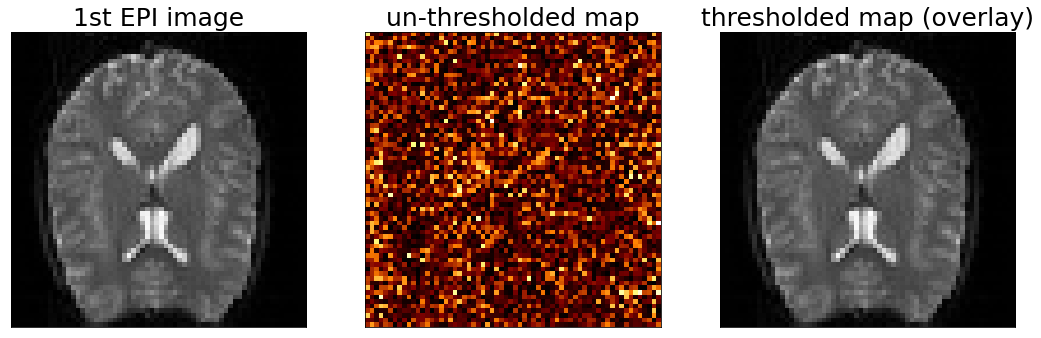

In [ ]:
beta, model, e, r = do_GLM(design_matrix, data)

r = r.reshape(x_size,y_size)
map = r.copy()
map[map<0.35] = np.nan

fig, ax = plt.subplots(1,3,figsize=(18, 6))

ax[0].imshow(mean_data, cmap='gray')
ax[0].set_title('1st EPI image', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(r, cmap='afmhot')
ax[1].set_title('un-thresholded map', fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(mean_data, cmap='gray')
ax[2].imshow(map, cmap='afmhot')
ax[2].set_title('thresholded map (overlay)', fontsize=25)
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

In [ ]:
# Import the data for slice 36
data = np.genfromtxt('./fMRI_data/csv_data/slice_36.csv', delimiter=',')

# These are the main parameters of the fMRI scan and experimental desgin
block_design    = ['rest', 'stim']
block_size      = 6
block_RT        = 7
block_total     = 16
block_length    = block_size*block_RT

acq_num         = block_size*block_total
data_time       = block_length*block_total
data_time_vol   = np.arange(acq_num)*block_RT

x_size = 64
y_size = 64

# Reshape the data
data_ordered = data.reshape(x_size, y_size, acq_num)

# Calculate the mean signal for each voxel
mean_data = data_ordered.mean(axis=2)

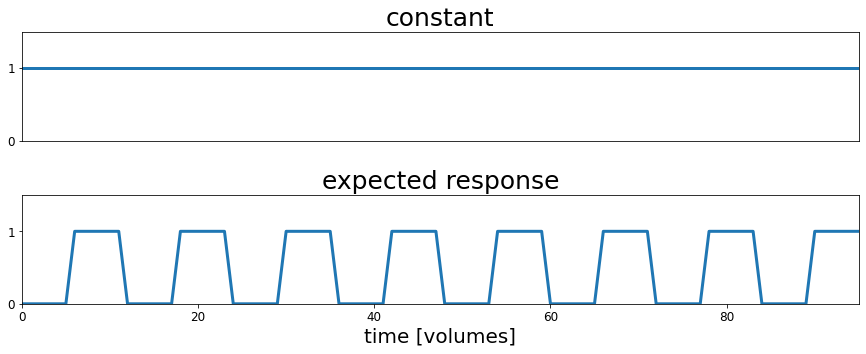

In [ ]:
# Create the design matrix
constant = np.ones(acq_num)
rest     = np.zeros(block_size)
stim     = np.ones(block_size)
block    = np.concatenate((rest, stim), axis=0)
predicted_response = np.tile(block, int(block_total/2))

design_matrix = np.array((constant, predicted_response))

# Create the plots
fig, ax = plt.subplots(2,1, figsize=(15, 5))
ax[0].plot(design_matrix[0], lw=3)
ax[0].set_xlim(0, acq_num-1)
ax[0].set_ylim(0, 1.5)
ax[0].set_title('constant', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([0,1])
ax[0].tick_params(labelsize=12)
ax[0].tick_params(labelsize=12)

ax[1].plot(design_matrix[1], lw=3)
ax[1].set_xlim(0, acq_num-1)
ax[1].set_ylim(0, 1.5)
ax[1].set_title('expected response', fontsize=25)
ax[1].set_yticks([0,1])
ax[1].set_xlabel('time [volumes]', fontsize=20)
ax[1].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)

fig.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

In [ ]:
def do_GLM(X, y):
    
    # Make sure design matrix has the right orientation
    if X.shape[1] > X.shape[0]:
        X = X.transpose()
    
    # Calculate the dot product of the transposed design matrix and the design matrix
    # and invert the resulting matrix.
    tmp   = np.linalg.inv(X.transpose().dot(X))
    
    # Now calculate the dot product of the above result and the transposed design matrix
    tmp   = tmp.dot(X.transpose())

    # Pre-allocate variables
    beta  = np.zeros((y.shape[0], X.shape[1]))
    e     = np.zeros(y.shape)
    model = np.zeros(y.shape)
    r     = np.zeros(y.shape[0])
    
    # Find beta values for each voxel and calculate the model, error and the correlation coefficients 
    for i in range(y.shape[0]):
        beta[i]  = tmp.dot(y[i,:].transpose())
        model[i] = X.dot(beta[i])
        e[i]     = (y[i,:] - model[i])
        r[i]     = np.sqrt(model[i].var()/y[i,:].var())
    
    return beta, model, e, r


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


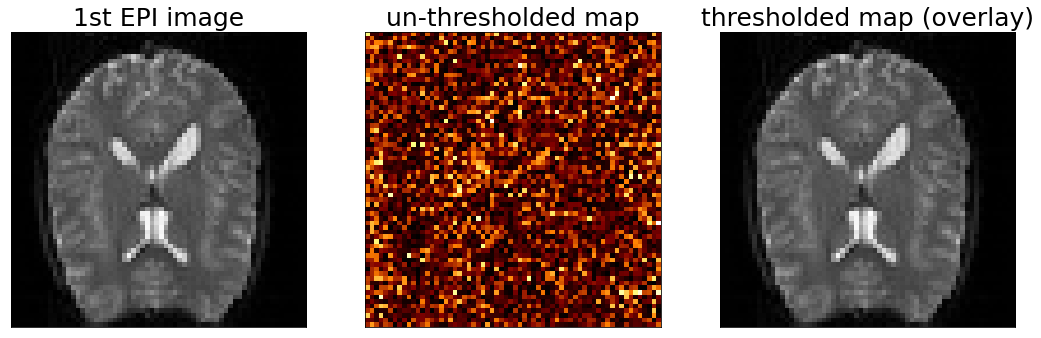

In [ ]:
beta, model, e, r = do_GLM(design_matrix, data)

r = r.reshape(x_size,y_size)
map = r.copy()
map[map<0.35] = np.nan

fig, ax = plt.subplots(1,3,figsize=(18, 6))

ax[0].imshow(mean_data, cmap='gray')
ax[0].set_title('1st EPI image', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(r, cmap='afmhot')
ax[1].set_title('un-thresholded map', fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(mean_data, cmap='gray')
ax[2].imshow(map, cmap='afmhot')
ax[2].set_title('thresholded map (overlay)', fontsize=25)
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


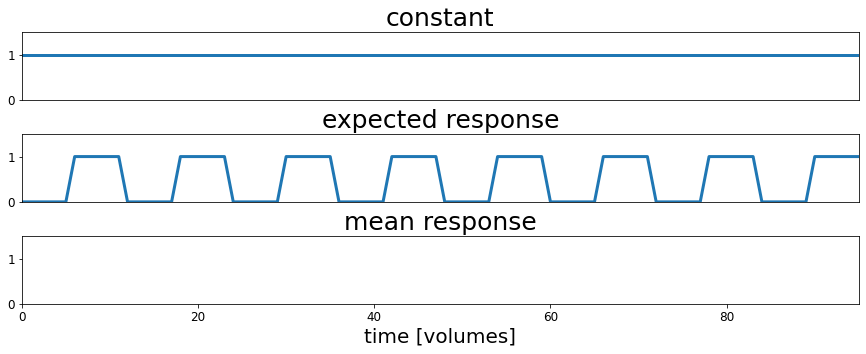

(3, 96)


In [ ]:
def scale(data):
    return (data - data.min()) / (data.max() - data.min())

def z_score(data):
    mean = data.mean(axis=1, keepdims=True)
    std = data.std(axis=1, keepdims=True)
    norm_data = (data-mean)/std
    return norm_data

avg = z_score(data_ordered[~np.isnan(map),:])
avg = np.transpose(avg).mean(axis=1)
avg = scale(avg)

design_matrix = np.array((constant, predicted_response, avg))


# Create the plots
fig, ax = plt.subplots(3,1, figsize=(15, 5))
ax[0].plot(design_matrix[0], lw=3)
ax[0].set_xlim(0, acq_num-1)
ax[0].set_ylim(0, 1.5)
ax[0].set_title('constant', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([0,1])
ax[0].tick_params(labelsize=12)
ax[0].tick_params(labelsize=12)

ax[1].plot(design_matrix[1], lw=3)
ax[1].set_xlim(0, acq_num-1)
ax[1].set_ylim(0, 1.5)
ax[1].set_title('expected response', fontsize=25)
ax[1].set_yticks([0,1])
ax[1].set_xticks([])
ax[1].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)

ax[2].plot(design_matrix[2], lw=3)
ax[2].set_xlim(0, acq_num-1)
ax[2].set_ylim(0, 1.5)
ax[2].set_title('mean response', fontsize=25)
ax[2].set_yticks([0,1])
ax[2].set_xlabel('time [volumes]', fontsize=20)
ax[2].tick_params(labelsize=12)
ax[2].tick_params(labelsize=12)

fig.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

print(design_matrix.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


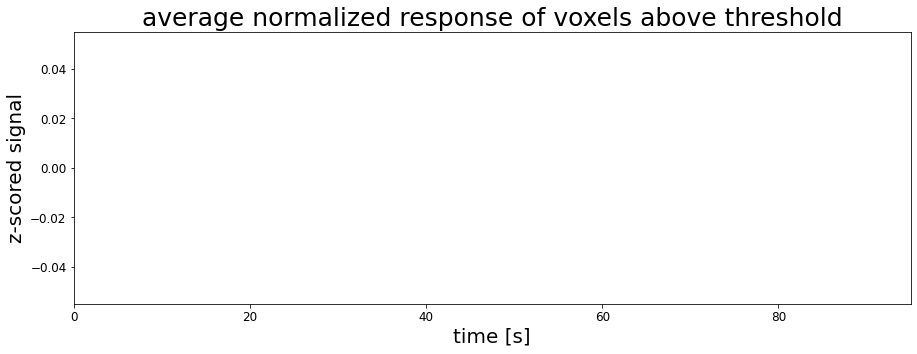

In [ ]:
avg = z_score(data_ordered[~np.isnan(map),:])

# and plot the result
fig, ax = plt.subplots(1,1,figsize=(15, 5))

ax.plot(np.transpose(avg).mean(axis=1), lw=3)
ax.set_title('average normalized response of voxels above threshold', fontsize=25)
ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('z-scored signal', fontsize=20)
ax.tick_params(labelsize=12)

plt.show()

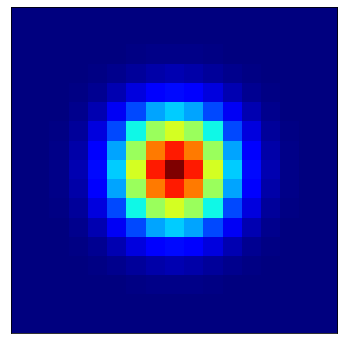

In [ ]:
# TAKEN FROM: http://subsurfwiki.org/wiki/Gaussian_filter

import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 
# Make the Gaussian by calling the function
gaussian_kernel_array = gaussian_kernel(8)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(gaussian_kernel_array, cmap='jet', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [ ]:
# Adapted from: http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

def conv_image(image, input_kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(input_kernel))    
    
    # Create output array
    output = np.zeros_like(image)            
    
    # Determine size parameters
    m, n = kernel.shape[0]-1, kernel.shape[1]-1
    M, N = int((m/2)), int((n/2))
    
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + m, image.shape[1] + n))   
    image_padded[M:-M, N:-N] = image
    
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            
            output[y,x]=(kernel*image_padded[y:y +m+1, x:x +n+1]).sum() 
            #output[y,x]=(kernel*image_padded[y:y +m+1, x:x +n+1]).mean() 
    return output

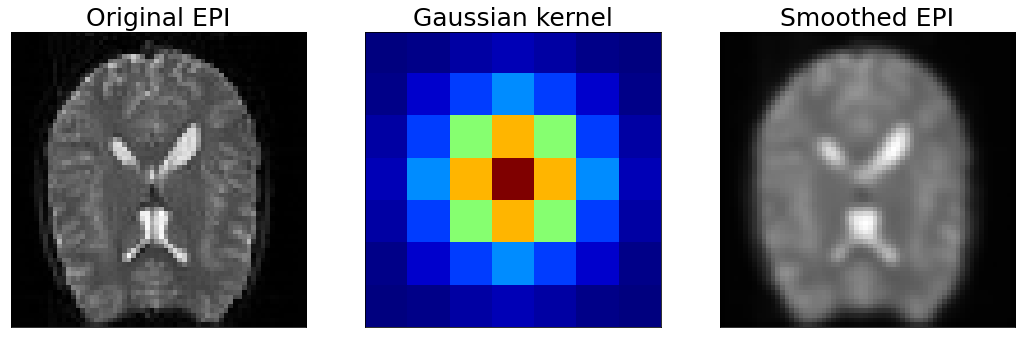

In [ ]:
gaussian_kernel_array = gaussian_kernel(3)
smoothed_mean_data = conv_image(mean_data, gaussian_kernel_array)


#plt.imshow(smoothed_mean_data, cmap='gray')

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(mean_data, cmap='gray')
ax[0].set_title('Original EPI', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(gaussian_kernel_array, cmap='jet', interpolation='nearest')
ax[1].set_title('Gaussian kernel', fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(smoothed_mean_data, cmap='gray')
ax[2].set_title('Smoothed EPI', fontsize=25)
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


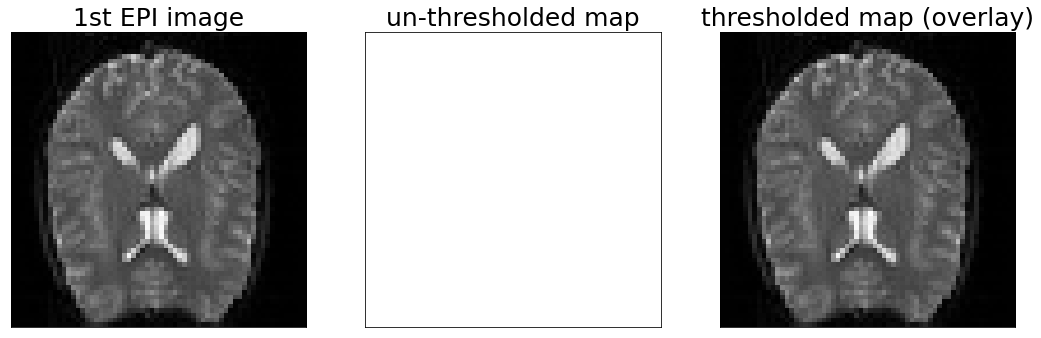

In [ ]:

gaussian_kernel_array = gaussian_kernel(3)

data_smoothed = np.zeros_like(data_ordered)
for i in range(data_ordered.shape[2]):
    data_smoothed[:,:,i] = conv_image(data_ordered[:,:,i], gaussian_kernel_array)
    
data_smoothed = data_smoothed.reshape(x_size * y_size, acq_num)
beta, model, e, r = do_GLM(design_matrix, data_smoothed)

r = r.reshape(x_size,y_size)
map = r.copy()
map[map<0.15] = np.nan

fig, ax = plt.subplots(1,3,figsize=(18, 6))

ax[0].imshow(mean_data, cmap='gray')
ax[0].set_title('1st EPI image', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(r, cmap='afmhot')
ax[1].set_title('un-thresholded map', fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(mean_data, cmap='gray')
ax[2].imshow(map, cmap='afmhot')
ax[2].set_title('thresholded map (overlay)', fontsize=25)
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()